TODO:

train on 64 then 128 then..

densenet arch, 

functionality to train for only depth with low lr DONE

import remaining yolo weights DONE

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## midas

In [ ]:
cd /content/gdrive/MyDrive/S15_NEW/

/content/gdrive/MyDrive/S15_NEW


In [ ]:
# !python /content/gdrive/MyDrive/S15_NEW/midas/run.py
!python midas/run.py
# perfect

initialize
device: cuda
Loading weights:  /content/gdrive/MyDrive/mega_model_weights.pt
Downloading: "https://github.com/facebookresearch/WSL-Images/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100% 340M/340M [00:01<00:00, 265MB/s]
start processing
  processing midas/input/1da89aacd2.jpg (1/10)
  processing midas/input/0b59d3bd16.jpg (2/10)
  processing midas/input/1f839e7d39.jpg (3/10)
  processing midas/input/1ca8a4bb9a.jpg (4/10)
  processing midas/input/2.jpg (5/10)
  processing midas/input/_112919912_gettyimages-1220030093.jpg (6/10)
  processing midas/input/1-embed-activewear.jpg (7/10)
  processing midas/input/1_IT_1599021257624 - Copy.jpeg (8/10)
  processing midas/input/01-prince-boots - Copy.jpg (9/10)
  processing midas/input/1.jpg (10/10)
finished


## yolov3

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [30]:
cd /content/gdrive/MyDrive/S15_NEW/yolov3/

/content/gdrive/MyDrive/S15_NEW/yolov3


replaced the train.py and utils.py file from Session_15 folder to avoid getting 'cuda assertion error'.
OR the real error was due to importing models_new rather than mega_model

modify the test file to accommodate for the change in model output since the model also outputs depth images

keep weights in the yolo weights directory for faster training

change the basemodel in midas to load weights

take weights from last.pt of session 13, not the spp_ultralytics

also change the weights in the weights directory of yolo when creating the custom weights

also change the detect.py file to cater for the change in model

decrease bs if training full model, else we can increase bs in case of training custom layers

would have been easier if making train.py from scratch rather than patching up both the models together

tried making separate encoder files but ran into problems afterwards, would've been nice if i wouldn't have wandered in those zones from the start

lambda_yolo 0.2 tentative and lambda_depth 5

at some points in time, i wondered it was necessary to know the whole pipeline of the code since patching demands that

training all the layers takes time (training depth and yolo both), (bs 256, img size 64 takes 10 min on T4)

error upon using bool type in opt

100 epochs is suff at 128 size. after that it stagnates

45-50 epochs is suff at 256 size

In [ ]:
# !watch -n 1 nvidia-smi

>

In [ ]:
torch.cuda.empty_cache() # free up cuda memory but it may not work always

In [ ]:
# results after 5 epochs
# cd /content/gdrive/MyDrive/S15_NEW/yolov3
from utils import utils
utils.plot_results()

In [ ]:
# testing on our dataset

# !python detect.py --conf-thres 0.1 --output out_out

bs of 5 and 512 img_size works but takes 20min for one epoch

In [ ]:
!python train.py --data data/customdata/custom.data --batch 512 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --resume --img-size 64 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' 
# 227/299
# 9.04G      6.26      8.33      2.17      16.8       483        64: 100% 7/7 [00:17<00:00,  2.56s/it]
#                Class    Images   Targets         P         R   mAP@0.5        F1: 100% 1/1 [00:02<00:00,  2.94s/it]
#                  all       354  1.58e+03         0         0  0.000365         0


Namespace(accumulate=4, adam=False, batch_size=512, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[64], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-11-26 17:29:36.248306: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv1.0.weight
conv1.0.bias
conv1.1.weight
conv1.1.bias
conv2.0.weigh

## 2nd dec only custom train

In [ ]:
!python train.py  --data data/customdata/custom.data --batch 512 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --img-size 64 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' --nosave

Namespace(accumulate=4, adam=False, batch_size=512, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=300, evolve=False, img_size=[64], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-12-02 06:32:46.177708: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Downloading: "https://github.com/facebookresearch/WSL-Images/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/che

In [ ]:
!python train.py  --data data/customdata/custom.data  --resume --batch 128 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --img-size 128 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' --nosave

Namespace(accumulate=4, adam=False, batch_size=128, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=200, evolve=False, img_size=[128], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-12-02 08:49:27.323104: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv1

In [ ]:
# PC 100 gpu can take care of this bs
!python train.py  --data data/customdata/custom.data  --resume --batch 64 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --img-size 256 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' --nosave

Namespace(accumulate=4, adam=False, batch_size=64, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=100, evolve=False, img_size=[256], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-12-02 10:55:59.996087: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv1.

In [ ]:
!python train.py  --data data/customdata/custom.data  --resume --batch 16 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 30 --img-size 512 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' --nosave

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=30, evolve=False, img_size=[512], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-12-02 14:44:21.211288: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv1.0

# 3rd dec yolo decoder train (all layers plus network changed a bit)

In [ ]:
!python train.py  --data data/customdata/custom.data --batch 512 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --img-size 64 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' 

Namespace(accumulate=4, adam=False, batch_size=512, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=300, evolve=False, img_size=[64], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-03 08:19:06.300234: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.

In [ ]:
!python train.py  --data data/customdata/custom.data --batch 128 --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --img-size 128 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/backup290.pt' 

Namespace(accumulate=4, adam=False, batch_size=128, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=100, evolve=False, img_size=[128], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/backup290.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-03 10:21:22.614174: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
c

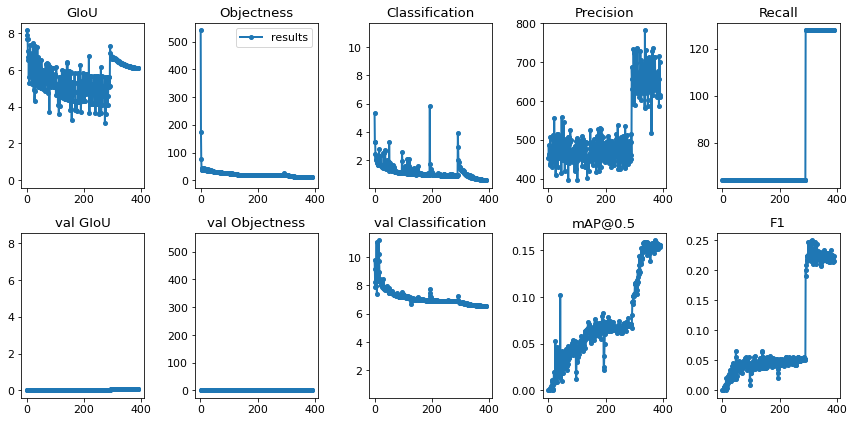

In [ ]:
from utils import utils
utils.plot_results()

In [ ]:
!python train.py  --data data/customdata/custom.data --batch 32 --resume --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 50 --img-size 256 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/backup290.pt' 

Namespace(accumulate=4, adam=False, batch_size=32, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=50, evolve=False, img_size=[256], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-03 13:02:20.698790: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv_d.0.weight
co

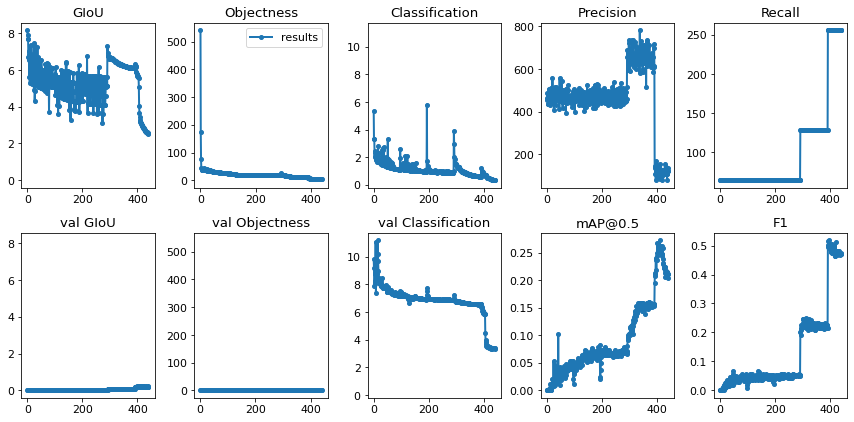

In [ ]:
from utils import utils
utils.plot_results()

In [ ]:
!python train.py  --data data/customdata/custom.data --batch 16 --resume --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 20 --img-size 448 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' 

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=20, evolve=False, img_size=[448], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-03 16:55:47.278437: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Downloading: "https://github.com/facebookresearch/WSL-Images/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100% 340M/340M [00:08<00:

resume from backup

In [7]:
!python train.py  --data data/customdata/custom.data --batch 16 --resume --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 10 --img-size 448 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/backup10.pt' 

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=10, evolve=False, img_size=[448], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-04 07:01:08.744814: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv_d.0.weight
co

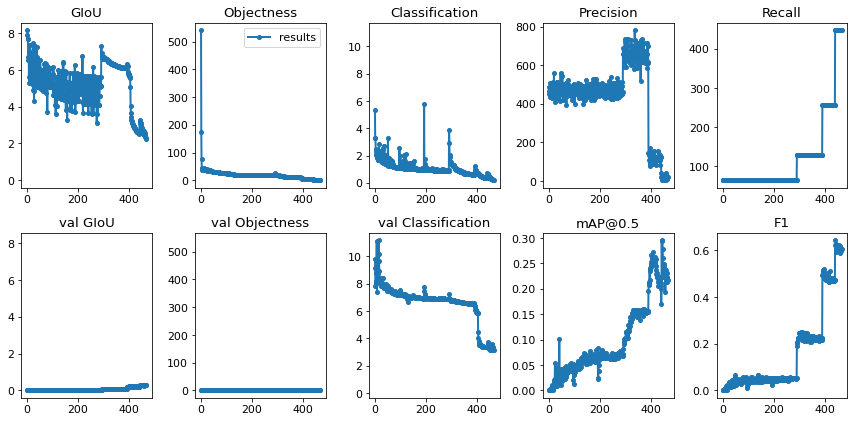

In [8]:
from utils import utils
utils.plot_results()

In [10]:
# tensorboard utils
!tensorboard --logdir=runs

2020-12-04 09:09:12.380906: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [12]:
# 512 size
!python train.py  --data data/customdata/custom.data --batch 10 --resume --depth 0 --yolo 1 --cache --cfg cfg/yolov3-custom.cfg --epochs 10 --img-size 512 --weights='/content/gdrive/MyDrive/S15_NEW/yolov3/weights/mega_model_weights.pt' 

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', depth=0, device='', epochs=10, evolve=False, img_size=[512], lambda_depth=5.0, lambda_yolo=0.2, multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt', yolo=1)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-04 09:16:11.544502: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
trainable params: 
conv_a.0.weight
conv_a.0.bias
conv_a.1.weight
conv_a.1.bias
conv_b.0.weight
conv_b.0.bias
conv_b.1.weight
conv_b.1.bias
conv_c.0.weight
conv_c.0.bias
conv_c.1.weight
conv_c.1.bias
conv_d.0.weight
co

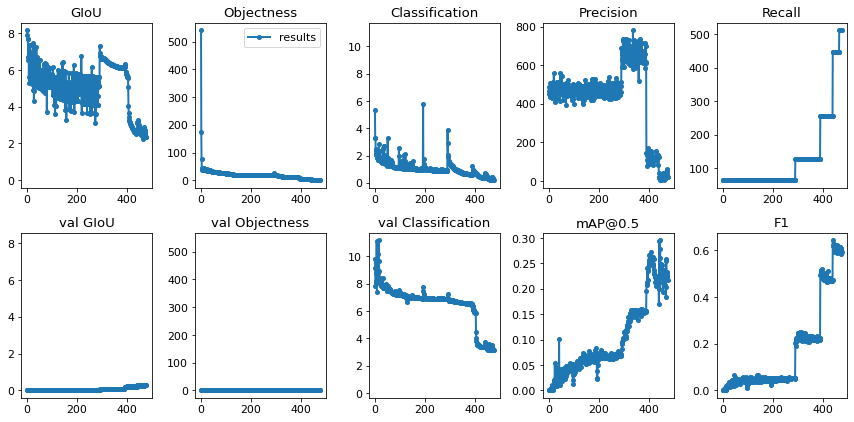

In [13]:
from utils import utils
utils.plot_results()

In [26]:
! tensorboard --logdir=runs

2020-12-04 12:03:42.573708: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [29]:
# testing on our dataset

!python detect.py --conf-thres 0.2 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.2, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Loading weights:  None
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_master
image 1/3590 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 3 bootss, Done. (0.119s)
image 2/3590 data/customdata/images/026f0ffddc.jpg: 384x512 1 masks, Done. (0.100s)
image 3/3590 data/customdata/images/032620_LS_covid-masks_inline-680.jpg: 320x512 2 hardhats, 2 masks, Done. (0.084s)
image 4/3590 data/customdata/images/046acbc8e1.jpg: 384x512 1 masks, Done. (0.103s)
image 5/3590 data/customdata/images/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg: 5

In [ ]:
# testing on our dataset

# !python detect.py --conf-thres 0.1 --iou-thres 0.1 --output out_out 